# Parallelization of K-means Clustering ALgorithm

## Visualize K-means clustering output

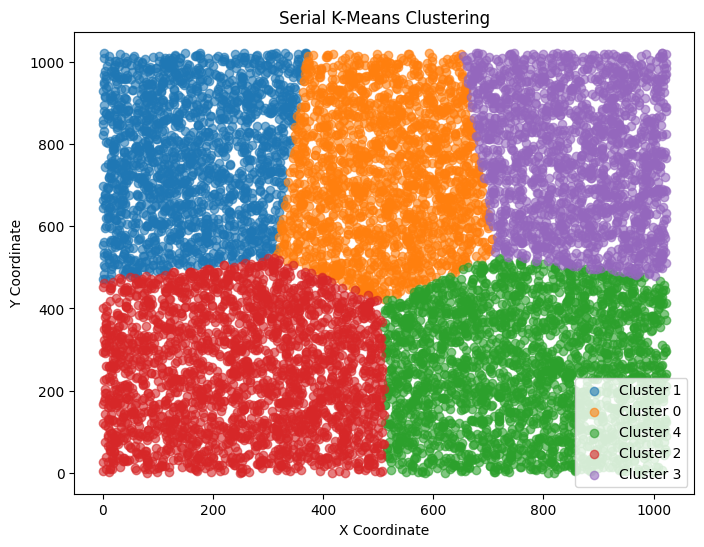

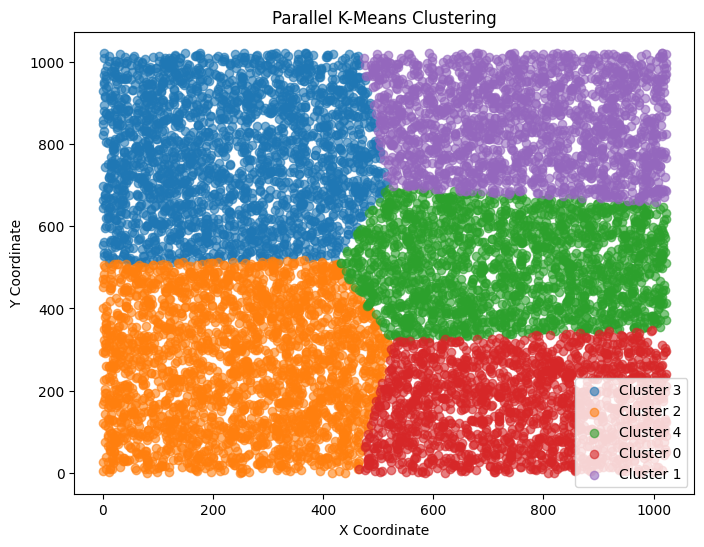

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_clusters(filename, title):
    df = pd.read_csv(filename, header=None, names=['x', 'y', 'cluster'])
    plt.figure(figsize=(8, 6))
    
    for cluster in df['cluster'].unique():
        subset = df[df['cluster'] == cluster]
        plt.scatter(subset['x'], subset['y'], label=f'Cluster {cluster}', alpha=0.6)
    
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.title(title)
    plt.legend()
    plt.show()

# Plot serial and parallel results
plot_clusters("data/serial_clusters.csv", "Serial K-Means Clustering")
plot_clusters("data/parallel_clusters.csv", "Parallel K-Means Clustering")


## Image Compression using K-means

### Utility Methods

In [6]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
def image_to_csv(image_path, csv_path):
    image = cv2.imread(image_path)
    h, w, _ = image.shape
    reshaped = image.reshape((-1, 3))  # Flatten to N x 3
    df = pd.DataFrame(reshaped, columns=["r", "g", "b"])
    df.to_csv(csv_path, index=False)
    print(f"Saved {len(df)} pixels to {csv_path}")

In [8]:
def csv_to_image(cluster_csv, output_path, image_shape):
    df = pd.read_csv(cluster_csv)
    pixels = df[["r", "g", "b"]].to_numpy().astype(np.uint8)
    image = pixels.reshape(image_shape)
    cv2.imwrite(output_path, image)
    print(f"Reconstructed image saved to {output_path}")


### Convert original image to input data

In [4]:
image_to_csv("images/original.jpg", "data/image_data.csv")

Saved 19961856 pixels to data/image_data.csv


### Convert K-means output to image

In [9]:
csv_to_image("data/compressed_parallel.csv", "images/compressed_parallel.jpg", (3648, 5472, 3))
csv_to_image("data/compressed_serial.csv", "images/compressed_serial.jpg", (3648, 5472, 3))

Reconstructed image saved to images/compressed_parallel.jpg
Reconstructed image saved to images/compressed_serial.jpg


### Visualize compressed images

In [10]:
image = cv2.imread('images/original.jpg')  
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
compressed_parallel = cv2.imread("images/compressed_parallel.jpg")
compressed_img_parallel_rgb = cv2.cvtColor(compressed_parallel, cv2.COLOR_BGR2RGB)
compressed_serial = cv2.imread("images/compressed_serial.jpg")
compressed_img_serial_rgb = cv2.cvtColor(compressed_serial, cv2.COLOR_BGR2RGB)

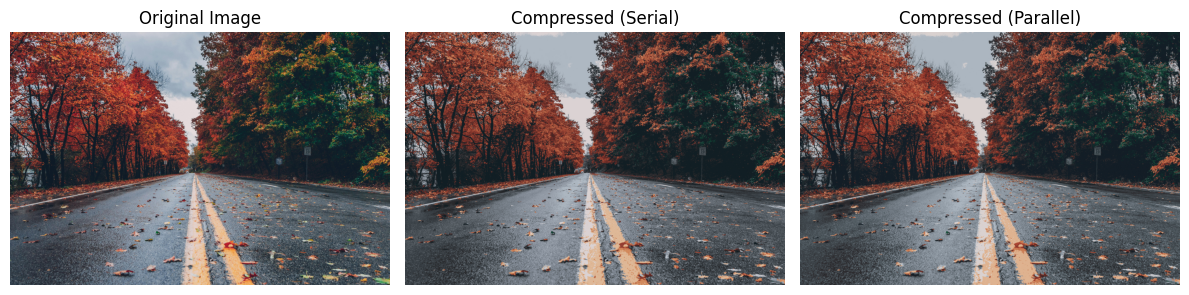

In [11]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(compressed_img_serial_rgb)
plt.title('Compressed (Serial)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(compressed_img_parallel_rgb)
plt.title('Compressed (Parallel)')
plt.axis('off')

plt.tight_layout()
plt.show()